### Dataset Reading

In [ ]:
import pandas as pd 
data = pd.read_excel('drive/My Drive/Constraint_Competition_Dataset/Constraint_Covid-19_English_Train.xlsx')
pd.set_option('display.max_colwidth',150)
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death...,real
1,2,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real
2,3,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG ...,real
4,5,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per mill...,real


In [ ]:
data.shape

(6420, 3)

In [ ]:
print(data.dtypes)

id        int64
tweet    object
label    object
dtype: object


### Making of "label" Variable

In [ ]:
label = data['label']
label.head()

0    real
1    real
2    fake
3    real
4    real
Name: label, dtype: object

### Checking Dataset Balancing

real    3360
fake    3060
Name: label, dtype: int64


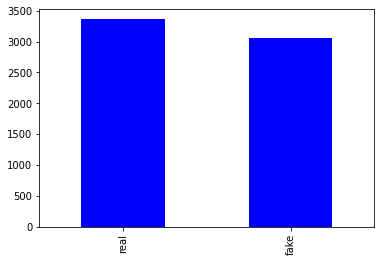

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

### Convering label into "0" or "1"

In [ ]:
import numpy as np
classes_list = ["fake","real"]
label_index = data['label'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])

[1 1 0 1 1 1 1 0 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Making of "text" Variable

In [ ]:
text = data['tweet']
text.head(10)

0    The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death...
1                        States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux
2                      Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville
3    #IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG ...
4    Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per mill...
5    Covid Act Now found "on average each person in Illinois with COVID-19 is infecting 1.11 other people. Data shows that the infection growth rate ha...
6    If you tested positive for #COVID19 and have no symptoms stay hom

### Dataset Pre-processing

In [ ]:
import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"I'm", "I am ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"shouldn", "should not ", text)
    text = re.sub(r"didn", "did not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"[0-9]", "", text)
    
    # text = re.sub(r"rt", " ", text)

  
    return text

In [ ]:
clean_text = text.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0    the cdc currently reports  deaths in general the discrepancies in death counts between different sources are small and explicable the death toll s...
1                                                        states reported  deaths a small rise from last tuesday southern states reported  of those deaths 
2                                                  politically correct woman almost uses pandemic as excuse not to reuse plastic bag coronavirus nashville
3     indiafightscorona : we have  covid testing laboratories in india and as on th august   tests have been done : profbhargava dg icmrdelhi staysafe ...
4    populous states can generate large case counts but if you look at the new cases per million today  smaller states are showing more cases per milli...
5    covid act now found on average each person in illinois with covid -  is infecting   other people data shows that the infection growth rate has dec...
6    if you tested positive for covid and have no symptoms stay home a

### Removing stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('english')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0             cdc currently reports  deaths general discrepancies death counts different sources small explicable death toll stands roughly  people today 
1                                                                        states reported  deaths small rise last tuesday southern states reported  deaths 
2                                                            politically correct woman almost uses pandemic excuse reuse plastic bag coronavirus nashville
3                          indiafightscorona :  covid testing laboratories india th august   tests done : profbhargava dg icmrdelhi staysafe indiawillwin 
4    populous states generate large case counts look new cases per million today  smaller states showing cases per million california texas : al ar id ...
5    covid act found average person illinois covid -  infecting   people data shows infection growth rate declined time factors stay - - home order res...
6                                       tested positive covid symptoms

### Lemmatization

In [ ]:
"""# Lemmatization 
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = "".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text"""

'# Lemmatization \nimport nltk\nnltk.download(\'wordnet\')\nfrom nltk.stem import WordNetLemmatizer\nlemmatizer = WordNetLemmatizer()\n\ndef word_lemmatizer(text):\n    lem_text = "".join([lemmatizer.lemmatize(i) for i in text])\n    return lem_text'

In [ ]:
"""clean_text_lem = clean_text_ns.apply(lambda x : word_lemmatizer(x))"""

'clean_text_lem = clean_text_ns.apply(lambda x : word_lemmatizer(x))'

In [ ]:
"""print(clean_text_lem.head(10))"""

'print(clean_text_lem.head(10))'

### Stemming

In [ ]:
# Stemming
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head(10))

0             cdc currently reports  deaths general discrepancies death counts different sources small explicable death toll stands roughly  people today 
1                                                                        states reported  deaths small rise last tuesday southern states reported  deaths 
2                                                            politically correct woman almost uses pandemic excuse reuse plastic bag coronavirus nashville
3                          indiafightscorona :  covid testing laboratories india th august   tests done : profbhargava dg icmrdelhi staysafe indiawillwin 
4    populous states generate large case counts look new cases per million today  smaller states showing cases per million california texas : al ar id ...
5    covid act found average person illinois covid -  infecting   people data shows infection growth rate declined time factors stay - - home order res...
6                                       tested positive covid symptoms

In [ ]:
# final_text = [x for x in clean_text_lem if len(x) > 3]

In [ ]:
#print(final_text)

### Tokenization using "keras"

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

### Making Vocab for words

In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

12242


In [ ]:
l = tok_all.word_index
print(l)

{'covid': 1, 'cases': 2, 'coronavirus': 3, 'new': 4, 'india': 5, 'people': 6, 'tests': 7, 'deaths': 8, 'states': 9, 'total': 10, 'number': 11, 'confirmed': 12, 'amp': 13, 'reported': 14, 'testing': 15, 'health': 16, 'today': 17, 'state': 18, 'one': 19, 'report': 20, 'day': 21, 'indiafightscorona': 22, 'pandemic': 23, 'virus': 24, 'hospital': 25, 'case': 26, 'patients': 27, 'vaccine': 28, 'update': 29, 'says': 30, 'data': 31, 'rt': 32, 'positive': 33, 'tested': 34, 'trump': 35, 'days': 36, 'test': 37, 'active': 38, 'may': 39, 'daily': 40, 'us': 41, 'lockdown': 42, 'last': 43, 'spread': 44, 'see': 45, 'recovered': 46, 'rate': 47, 'video': 48, 'world': 49, 'also': 50, 'million': 51, 'yesterday': 52, 'shows': 53, 'discharged': 54, 'isolation': 55, 'government': 56, 'president': 57, 'cdc': 58, 'news': 59, 'two': 60, 'country': 61, 'lagos': 62, 'home': 63, 'coronavirusupdates': 64, 'get': 65, 'risk': 66, 'death': 67, 'first': 68, 'week': 69, 'since': 70, 'numbers': 71, 'mohfw': 72, 'time': 7

### encoding or sequencing

In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[1])
print(encoded_clean_text_stem[1])

states reported  deaths small rise last tuesday southern states reported  deaths 
[9, 14, 8, 566, 327, 43, 864, 2237, 9, 14, 8]


### Pre-padding

In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Test Data Pre-processing

# Data test Reading

In [ ]:
data_t = pd.read_excel('drive/My Drive/Constraint_Competition_Dataset/Constraint_Covid-19_English_Val.xlsx')
pd.set_option('display.max_colwidth',150)
data_t.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,fake
1,2,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin",fake
3,4,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: https:/...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇 https://t.co/jvGZlS...,real


In [ ]:
data_t.shape

(2140, 3)

In [ ]:
print(data_t.dtypes)

id        int64
tweet    object
label    object
dtype: object


# Making of "label" Variable

In [ ]:
label_t = data_t['label']
label_t.head()

0    fake
1    fake
2    fake
3    fake
4    real
Name: label, dtype: object

# Checking Dataset Balancing

real    1120
fake    1020
Name: label, dtype: int64


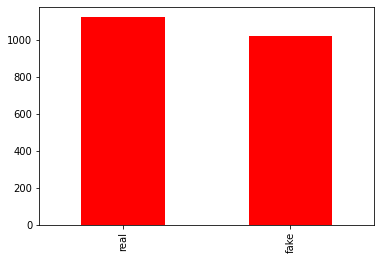

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

# Convering label into "0" or "1"

In [ ]:
import numpy as np
classes_list_t = ["fake","real"]
label_t_index = data_t['label'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])

[0 0 0 0 1 1 1 1 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)

In [ ]:
print(label_twoDimension_t[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Making of "text" Variable

In [ ]:
text_t = data_t['tweet']
text_t.head(10)

0                                           Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country
1    11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive...
2                                                                             COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin
3    Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: https:/...
4    6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇 https://t.co/jvGZlS...
5    No one can leave managed isolation for any reason without returning a negative test. If they refuse a test they can then be held for a period of u...
6    #IndiaFightsCorona India has one of the lowest #COVID19 mortality

# **Dataset Pre-processing**
1. Remove unwanted words
2. Stopwords removal
3. Stemming
4. Tokenization
5. Encoding or Sequencing
6. Pre-padding

### 1. Removing Unwanted Words

In [ ]:
import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"I'm", "I am ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"shouldn", "should not ", text)
    text = re.sub(r"didn", "did not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"[0-9]", "", text)

    # text = re.sub(r"rt", " ", text)

  
    return text

In [ ]:
clean_text_t = text_t.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                               chinese converting to islam after realising that no muslim was affected by coronavirus covd in the country
1     out of  people from the diamond princess cruise ship who had intially tested negative in tests in japan were later confirmed to be positive in th...
2                                                                              covid -  is caused by a bacterium not virus and can be treated with aspirin
3             mike pence in rnc speech praises donald trump s covid -  seamless partnership with governors and leaves out the president state feuds : rnc 
4                                        sky edconwaysky explains the latest covid data and government announcement get more on the coronavirus data here 
5    no one can leave managed isolation for any reason without returning a negative test if they refuse a test they can then be held for a period of up...
6     indiafightscorona india has one of the lowest covid mortality gl

### 2. Removing Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('english')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                              chinese converting islam realising muslim affected coronavirus covd country
1                                         people diamond princess cruise ship intially tested negative tests japan later confirmed positive united states 
2                                                                                                          covid -  caused bacterium virus treated aspirin
3                                   mike pence rnc speech praises donald trump covid -  seamless partnership governors leaves president state feuds : rnc 
4                                                                 sky edconwaysky explains latest covid data government announcement get coronavirus data 
5     one leave managed isolation reason without returning negative test refuse test held period  days june th exemptions compassionate grounds suspended 
6     indiafightscorona india one lowest covid mortality globally less

### 3. Stemming

In [ ]:
# Stemming
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                              chinese converting islam realising muslim affected coronavirus covd country
1                                         people diamond princess cruise ship intially tested negative tests japan later confirmed positive united states 
2                                                                                                          covid -  caused bacterium virus treated aspirin
3                                   mike pence rnc speech praises donald trump covid -  seamless partnership governors leaves president state feuds : rnc 
4                                                                 sky edconwaysky explains latest covid data government announcement get coronavirus data 
5     one leave managed isolation reason without returning negative test refuse test held period  days june th exemptions compassionate grounds suspended 
6     indiafightscorona india one lowest covid mortality globally less

### 4. Tokenization

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)

In [ ]:
vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)

6742


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'covid': 1, 'cases': 2, 'coronavirus': 3, 'new': 4, 'india': 5, 'tests': 6, 'people': 7, 'states': 8, 'deaths': 9, 'total': 10, 'number': 11, 'reported': 12, 'confirmed': 13, 'testing': 14, 'amp': 15, 'today': 16, 'day': 17, 'state': 18, 'health': 19, 'indiafightscorona': 20, 'virus': 21, 'one': 22, 'says': 23, 'report': 24, 'hospital': 25, 'pandemic': 26, 'rate': 27, 'patients': 28, 'vaccine': 29, 'data': 30, 'positive': 31, 'test': 32, 'rt': 33, 'update': 34, 'days': 35, 'case': 36, 'lockdown': 37, 'spread': 38, 'last': 39, 'active': 40, 'since': 41, 'may': 42, 'tested': 43, 'daily': 44, 'isolation': 45, 'help': 46, 'trump': 47, 'news': 48, 'us': 49, 'corona': 50, 'discharged': 51, 'video': 52, 'government': 53, 'cdc': 54, 'see': 55, 'coronavirusupdates': 56, 'time': 57, 'shows': 58, 'pm': 59, 'high': 60, 'week': 61, 'numbers': 62, 'recovered': 63, 'million': 64, 'risk': 65, 'yesterday': 66, 'per': 67, 'home': 68, 'due': 69, 'also': 70, 'china': 71, 'get': 72, 'first': 73, 'country'

### 5. Encoding or Sequencing

In [ ]:
encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])

chinese converting islam realising muslim affected coronavirus covd country
[212, 8563, 4068, 776, 394, 3, 8330, 61]


### 6. Pre-padding

In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')

# GloVe Embedding

In [ ]:
# GloVe Embedding link - https://nlp.stanford.edu/projects/glove/

import os
import numpy as np

embeddings_index = {}
f = open('drive/MyDrive/Embeddings/Copy of glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

# **CNN Model**

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)

In [ ]:
CNN2_model=Sequential([Embedding_Layer,
                        Conv1D(128,5,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(32,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dense(2,activation="sigmoid")
                       
                       ])

In [ ]:
CNN2_model.summary()

In [ ]:
from keras.optimizers import Adam
CNN2_model.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN2_model, to_file='CNN2_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)

### **Model Fitting or Training**

In [ ]:
hist = CNN2_model.fit(padded_clean_text_stem,label_twoDimension,epochs=100,batch_size=32,callbacks=[earlystopper, reduce_lr])

# log loss

In [ ]:
CNN2_model_predictions = CNN2_model.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN2_model_predictions)
log_loss_test

# Classification Report

In [ ]:
predictions = np.zeros_like(CNN2_model_predictions)
predictions[np.arange(len(CNN2_model_predictions)), CNN2_model_predictions.argmax(1)] = 1

In [ ]:
predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger

In [ ]:
'''pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)'''

In [ ]:
# df.to_csv("submission_EN_A.csv", index=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))

# Epoch v/s Loss Plot

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN2_HASOC_Eng_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN2_HASOC_Eng_lossPlot.pdf') 

# Epoch v/s Accuracy Plot

In [ ]:
plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN2_HASOC_Eng_accuracyPlot.pdf',dpi=1000)
files.download('CNN2_HASOC_Eng_accuracyPlot.pdf') 

# Area under Curve-ROC

In [ ]:
pred_train = CNN2_model.predict(padded_clean_text_stem)
pred_test = CNN2_model.predict(padded_clean_text_t_stem)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN2_HASOC_Eng_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN2_HASOC_Eng_Area_RocPlot.pdf')

  

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)